# Ames Iowa Home Prices

---
author: Alex Kim
date: October 16, 2024
embed-resources: true
---

## Introduction

The price of homes is an extremely crucial information for buyers as they buy and could live in these homes for many years. For most people, buying a home is the biggest purchase of their life. In fact, a mortgage is often required with a repayment schedule spread over 30 years. As an online real estate listing aggregator, similar to well-known platforms like Zillow, our objective is to provide accurate predictions of home sale prices given various features of the home such as size, number of bathrooms and bedrooms, and more. Users of the real estate website can use the predictions to assess actual list prices and aid sellers in setting appropriate and informed prices for their properties.

## Methods

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_percentage_error

### Data Dictionary

#### Response
* **SalePrice** [int64]: Sale price
#### Feature
* **Order** [int64]: Observation number
* **PID** [int64]: Parcel identification number - can be used with city web site for parcel review
* **MS SubClass** [int64]: Identifies the type of dwelling involved in the sale
* **MS Zoning** [object]:  Identifies the general zoning classification of the sale
* **Lot Frontage** [float64]: Linear feet of street connected to property
* **Lot Area** [int64]: Lot size in square feet
* **Street** [object]: Type of road access to property
* **Alley** [object]: Type of alley access to property
* **Lot Shape** [object]: General shape of property
* **Land Contour** [object]: Flatness of the property
* **Utilities** [object]: Type of utilities available
* **Lot Config** [object]: Lot configuration
* **Land Slope** [object]: Slope of property
* **Neighborhood** [object]: Physical locations within Ames city limits (map available)
* **Condition 1** [object]: Proximity to various conditions
* **Condition 2** [object]: Proximity to various conditions (if more than one is present)
* **Bldg Type** [object]: Type of dwelling
* **House Style** [object]: Style of dwelling
* **Overall Qual** [int64]: Rates the overall material and finish of the house
* **Overall Cond** [int64]: Rates the overall condition of the house
* **Year Built** [int64] Original construction date
* **Year Remod/Add** [int64] Remodel date (same as construction date if no remodeling or additions)
* **Roof Style** [object] Type of roof
* **Roof Matl** [object] Roof material
* **Exterior 1st** [object] Exterior covering on house
* **Exterior 2nd** [object] Exterior covering on house (if more than one material)
* **Mas Vnr Type** [object] Masonry veneer type
* **Mas Vnr Area** [float64] Masonry veneer area in square feet
* **Exter Qual** [object] Evaluates the quality of the material on the exterior
* **Exter Cond** [object] Evaluates the present condition of the material on the exterior
* **Foundation** [object] Type of foundation
* **Bsmt Qual** [object] Evaluates the height of the basement
* **Bsmt Cond** [object] Evaluates the general condition of the basement
* **Bsmt Exposure** [object] Refers to walkout or garden level walls
* **BsmtFin Type 1** [object] Rating of basement finished area
* **BsmtFin SF 1** [float64] Type 1 finished square feet
* **BsmtFin Type 2** [object] Rating of basement finished area (if multiple types)
* **BsmtFin SF 2** [float64] Type 2 finished square feet
* **Bsmt Unf SF** [float64] Unfinished square feet of basement area
* **Total Bsmt SF** [float64] Total square feet of basement area
* **Heating** [object] Type of heating
* **Heating QC** [object] Heating quality and condition
* **Central Air** [object] Central air conditioning
* **Electrical** [object] Electrical system
* **1st Flr SF** [int64] First Floor square feet
* **2nd Flr SF** [int64] Second floor square feet
* **Low Qual Fin SF** [int64] Low quality finished square feet (all floors)
* **Gr Liv Area** [int64] Above grade (ground) living area square feet
* **Bsmt Full Bath** [float64] Basement full bathrooms
* **Bsmt Half Bath** [float64] Basement half bathrooms
* **Full Bath** [int64] Full bathrooms above grade
* **Half Bath** [int64] Half baths above grade
* **Bedroom AbvGr** [int64] Bedrooms above grade (does not include basement bedrooms)
* **Kitchen AbvGr** [int64] Kitchens above grade
* **Kitchen Qual** [object] Kitchen quality
* **TotRms AbvGrd** [int64] Total rooms above grade (does not include bathrooms)
* **Functional** [object] Home functionality (Assume typical unless deductions are warranted)
* **Fireplaces** [int64] Number of fireplaces
* **Fireplace Qu** [object] Fireplace quality
* **Garage Type** [object] Garage location
* **Garage Yr Blt** [float64] Year garage was built
* **Garage Finish** [object] Interior finish of the garage
* **Garage Cars** [float64] Size of garage in car capacity
* **Garage Area** [float64] Size of garage in square feet
* **Garage Qual** [object] Garage quality
* **Garage Cond** [object] Garage condition
* **Paved Drive** [object] Paved driveway
* **Wood Deck SF** [int64] Wood deck area in square feet
* **Open Porch SF** [int64] Open porch area in square feet
* **Enclosed Porch** [int64] Enclosed porch area in square feet
* **3Ssn Porch** [int64] Three season porch area in square feet
* **Screen Porch** [int64] Screen porch area in square feet
* **Pool Area** [int64] Pool area in square feet
* **Pool QC** [object] Pool quality
* **Fence** [object] Fence quality
* **Misc Feature** [object] Miscellaneous feature not covered in other categories
* **Misc Val** [int64] Value of miscellaneous feature
* **Mo Sold** [int64] Month Sold
* **Yr Sold** [int64] Year Sold
* **Sale Type** [object] Type of sale
* **Sale Condition** [object] Condition of sale



### Data
All or most categorical and numerical features mentioned above like size, number of bathrooms and bedrooms, and more will be utilized to fit the model.


In [22]:
# load data
ames_train = pd.read_csv(
    "https://cs307.org/lab-04/data/ames-train.csv",
)
ames_test = pd.read_csv(
    "https://cs307.org/lab-04/data/ames-test.csv",
)

In [23]:
ames_train

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,2832,908188140,160,RM,24.0,2522,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,137500
1,2736,905426150,80,RL,NaN,19690,Pave,NaN,IR1,Lvl,...,738,Gd,GdPrv,NaN,0,8,2006,WD,Alloca,274970
2,2135,907200130,20,RL,97.0,11800,Pave,NaN,IR1,Bnk,...,0,NaN,NaN,NaN,0,8,2007,WD,Family,131000
3,2424,528228415,120,RM,NaN,3072,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,178740
4,1967,535457020,20,RL,80.0,8000,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,11,2007,WD,Normal,156500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1870,1020,527302070,20,RL,NaN,10825,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,181900
1871,237,905426200,20,RL,65.0,11479,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,144500
1872,1547,910202050,30,RM,40.0,3636,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,1,2008,WD,Normal,55000
1873,1855,533251110,20,RL,80.0,12000,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,255000


The train dataset contains 1875 rows and 82 columns. This tells us that there are 1875 samples and 81 features.

In [24]:
# summary statistics

## Mean, Median, and Standard Deviation of SalePrice (Response Variable)
mean_saleprice = ames_train['SalePrice'].mean()
median_saleprice = ames_train['SalePrice'].median()
std_saleprice = ames_train['SalePrice'].std()
print(f"Mean of SalePrice: {mean_saleprice}")
print(f"Median of SalePrice: {median_saleprice}")
print(f"Standard Deviation of SalePrice: {std_saleprice}")

Mean of SalePrice: 179185.0656
Median of SalePrice: 160200.0
Standard Deviation of SalePrice: 77933.88942414788


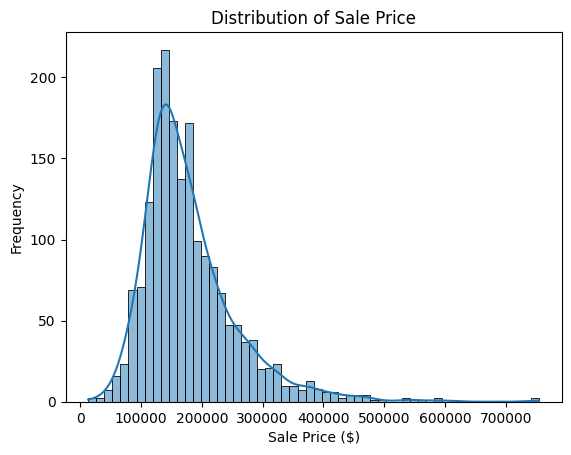

In [25]:
# visualizations
sns.histplot(ames_train["SalePrice"], kde=True)
plt.title("Distribution of Sale Price")
plt.xlabel("Sale Price ($)")
plt.ylabel("Frequency")
plt.show()

This histogram that uses Sale Price in US Dollars show the distribution of Sale Price in terms of its frequencies. From this, we can tell that there are a lot of instances where the Sale Price was between $100000 ~ $200000 compared to any other price ranges.

### Models

In [26]:
# process data for ML
# create X and y for train dataset
X_train = ames_train.drop("SalePrice", axis=1)
y_train = ames_train["SalePrice"]

# create X and y for test dataset
X_test = ames_test.drop("SalePrice", axis=1)
y_test = ames_test["SalePrice"]

In [27]:
ames_train.dtypes

Order               int64
PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
                   ...   
Mo Sold             int64
Yr Sold             int64
Sale Type          object
Sale Condition     object
SalePrice           int64
Length: 82, dtype: object

In [28]:
# helper function to find columns that are mostly missing
def columns_missing_above_threshold(df, threshold):
    missing_proportion = df.isnull().sum() / len(df)
    columns_above_threshold = missing_proportion[missing_proportion > threshold].index.tolist()
    return columns_above_threshold

In [29]:
# define columns to be excluded
many_missing_columns = columns_missing_above_threshold(X_train, 0.6)
exclude_columns = ["Order", "PID"] + many_missing_columns

# find columns with string data type (will be considered categorical)
string_columns = X_train.select_dtypes(include=["object"]).columns.tolist()
string_columns = [col for col in string_columns if col not in exclude_columns]

# find columns with numeric data type
numeric_columns = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
numeric_columns = [col for col in numeric_columns if col not in exclude_columns]

Some features, like 'PID' and 'Order', with high missing (or irrelevant) value proportion were removed. These features were excluded mainly because they bring no significant or meaningful value when it comes to home prices prediction.

In [30]:
# train models
# define pipeline for numeric
numeric_preprocessor = Pipeline(
    steps=[
        ("MedianImputer", SimpleImputer(strategy="median")),
        ("Standardize", StandardScaler()),
    ]
)

# define preprocessing pipeline for categorical
categorical_preprocessor = Pipeline(
    steps=[
        ("ModalImputer", SimpleImputer(strategy="most_frequent")),
        ("OneHotEncoder", OneHotEncoder(handle_unknown="infrequent_if_exist", max_categories=5)),
    ]
)

# column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("ExcludeColumns", "drop", exclude_columns),
        ("CategoricalPreprocessing", categorical_preprocessor, string_columns),
        ("NumericProcessing", numeric_preprocessor, numeric_columns),
    ],
    remainder="drop",
)

# full pipline
pipeline = Pipeline(
    steps=[
        ("Preprocessor", preprocessor),
        ("Regressor", DummyRegressor()),
    ]
)

In [31]:
# define parameter grid
param_grid = [
    {
        "Regressor": [DummyRegressor()],
    },
    {
        "Regressor": [LinearRegression()],
    },
    {
        "Regressor": [KNeighborsRegressor()],
        "Regressor__n_neighbors": [1, 3, 5, 7, 9, 11, 15],
    },
    {
        "Regressor": [DecisionTreeRegressor()],
        "Regressor__max_depth": [1, 3, 5, 7, 9, 11, 15, None],
    },
    {
        "Regressor": [HistGradientBoostingRegressor()],
        "Regressor__learning_rate": [0.1, 0.01, 0.001],
        "Regressor__max_iter": [1000],
        "Regressor__max_depth": [None, 3],
        "Regressor__l2_regularization": [0.1, 1.0],
    },
]

In [32]:
pipeline

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(transformers=[('ExcludeColumns', 'drop',
                                                  ['Order', 'PID', 'Alley',
                                                   'Pool QC', 'Fence',
                                                   'Misc Feature']),
                                                 ('CategoricalPreprocessing',
                                                  Pipeline(steps=[('ModalImputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('OneHotEncoder',
                                                                   OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                                 max_categories=5))]),
                                                  ['MS Zoning', 'St...
                                                   'Year Remod/Add',
                                                   'Mas Vnr Area',
                                                   'BsmtFin SF 1',
                                                   'BsmtFin SF 2',
                                                   'Bsmt Unf SF',
                                                   'Total Bsmt SF',
                                                   '1st Flr SF', '2nd Flr SF',
                                                   'Low Qual Fin SF',
                                                   'Gr Liv Area',
                                                   'Bsmt Full Bath',
                                                   'Bsmt Half Bath',
                                                   'Full Bath', 'Half Bath',
                                                   'Bedroom AbvGr',
                                                   'Kitchen AbvGr',
                                                   'TotRms AbvGrd',
                                                   'Fireplaces',
                                                   'Garage Yr Blt',
                                                   'Garage Cars', 'Garage Area',
                                                   'Wood Deck SF',
                                                   'Open Porch SF',
                                                   'Enclosed Porch', ...])])),
                ('Regressor', DummyRegressor())])

In [33]:
mod = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    n_jobs=-1,
    cv=5,
    verbose=2,
    scoring="neg_mean_absolute_percentage_error",
)

In [34]:
mod.fit(X_train, y_train)

Fitting 5 folds for each of 29 candidates, totalling 145 fits
[CV] END .........................Regressor=DummyRegressor(); total time=   0.2s
[CV] END .........................Regressor=DummyRegressor(); total time=   0.2s
[CV] END .........................Regressor=DummyRegressor(); total time=   0.2s
[CV] END .........................Regressor=DummyRegressor(); total time=   0.2s
[CV] END .........................Regressor=DummyRegressor(); total time=   0.2s
[CV] END .......................Regressor=LinearRegression(); total time=   0.2s
[CV] END .......................Regressor=LinearRegression(); total time=   0.2s
[CV] END .......................Regressor=LinearRegression(); total time=   0.2s
[CV] END Regressor=KNeighborsRegressor(), Regressor__n_neighbors=1; total time=   0.1s
[CV] END Regressor=KNeighborsRegressor(), Regressor__n_neighbors=1; total time=   0.1s
[CV] END Regressor=KNeighborsRegressor(), Regressor__n_neighbors=1; total time=   0.1s
[CV] END ....................

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Preprocessor',
                                        ColumnTransformer(transformers=[('ExcludeColumns',
                                                                         'drop',
                                                                         ['Order',
                                                                          'PID',
                                                                          'Alley',
                                                                          'Pool '
                                                                          'QC',
                                                                          'Fence',
                                                                          'Misc '
                                                                          'Feature']),
                                                                        ('CategoricalPreprocessing',
                                                                         Pipeline(steps=[('ModalImputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('OneHotEncoder',
                                                                                          OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                                                        max_...
                          'Regressor__n_neighbors': [1, 3, 5, 7, 9, 11, 15]},
                         {'Regressor': [DecisionTreeRegressor()],
                          'Regressor__max_depth': [1, 3, 5, 7, 9, 11, 15,
                                                   None]},
                         {'Regressor': [HistGradientBoostingRegressor()],
                          'Regressor__l2_regularization': [0.1, 1.0],
                          'Regressor__learning_rate': [0.1, 0.01, 0.001],
                          'Regressor__max_depth': [None, 3],
                          'Regressor__max_iter': [1000]}],
             scoring='neg_mean_absolute_percentage_error', verbose=2)

In [35]:
mod.best_params_

{'Regressor': HistGradientBoostingRegressor(),
 'Regressor__l2_regularization': 1.0,
 'Regressor__learning_rate': 0.01,
 'Regressor__max_depth': None,
 'Regressor__max_iter': 1000}

In [36]:
print(f"CV MAPE: {-mod.best_score_}")

CV MAPE: 0.09323748138117231


This model achieves a Cross-Validation Mean Absolute Percentage Error (MAPE) of 0.09323.

## Results

In [37]:
# report model metrics
y_test_pred = mod.predict(X_test)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
print(f"Test MAPE: {test_mape}")

Test MAPE: 0.08164649164771304


This model achieves a test Mean Absolute Percentage Error (MAPE) of 0.08164. 

## Discussion

Are there any variables that obviously should not be included? (Yes!) This could possibly be discussed in the data section.

Through the development process of the model that predicts home sale prices, I developed a model that achieves a Cross-Validation Mean Absolute Percent Error of 9.3237% and test Mean Absolute Percentage Error (MAPE) of 8.164%. Features like size, number of bathrooms and bedrooms, and more were utilized to fit the model. Meanwhile, some features, such as 'PID' and 'Order', with high missing (or irrelevant) value proportion were removed. These features were excluded because they bring no significant or meaningful value when it comes to home prices prediction. As mentioned earlier, the model shows pretty strong performance, according to both of its cross-validation mean absolute precent error and test mean absolute precent error. However, this model would not be practical to be put into practice in a real-world scenario. A model that can be put in to practice in a real world setting would require it to be much more sophisticated and time-senstive, considering factors such as trends based on geographic locations and interest rates that changes frequently. This model, however, will be appropriate to use in Ames, Iowa in 2011. This is mainly because the data used to train the model is consisted of information and conditions in Ames, Iowa in 2011. This model would be considered suitable and appropriate for both buyers and sellers of homes and properties at the time. It would not be ideal or appropriate for this model to be used to generalize other markets or geographic locations with drastically different conditions and characteristics. Therefore, areas with extremely different conditions from Ames, Iowa would most likely produce poor predictions. 

A downside of using MAPE is that it tends to be biased for very low-cost and high-cost homes (outliers). At first, the model may seem like it is doing a reasonable job in terms of percentage error for high-cost homes. However, for low-cost homes,  a huge or significant percentage error can be resulted from a small absolute error in the model. In this specific scenario, our model did achieve a good MAPE, but it is likely that the model does not peform equally well across all price ranges. 

### Conclusion

Overall, although the predictive model for Ames, Iowa home prices demonstrates strong performances, it is not ideal to use this model for real-world scenario. In order for the model to be put into effective use in real-world setting, it must be refined and modified thoroughly. Because the data used to train and develop the model is limited in terms of location and time, the model's generalizability and performacne is limited to certain conditions.